## Preparing Data

In [3]:

import pandas as pd
import os

xlsx_directory = "/Users/Lynsey/Documents/UA_GG4257/UA Repo/IRP_ Aberdeen Housing Market"  # reading file 
xlsx_files = [file for file in os.listdir(xlsx_directory) if file.endswith(".xlsx")]

merged_data = pd.DataFrame() # create data frame

# Loop through each CSV file
for xlsx_file in xlsx_files:
    xlsx_path = os.path.join(xlsx_directory, xlsx_file) 
    df_xlsx = pd.read_excel(xlsx_path)
    merged_data = pd.concat([merged_data, df_xlsx], axis=1)


In [4]:
count = (merged_data.columns == 'oa_code').sum()
count # shows there are 12 columns so need to make sure there is only one

12

In [5]:
print(merged_data.columns)

Index(['oa_code', 'KS402SC_All households', 'Owned: Owned outright',
       'Owned: Owned with a mortgage or loan',
       'Owned: Shared ownership (part owned and part rented)',
       'Rented: Council (Local authority)', 'Rented: Other social rented',
       'Rented: Private landlord or letting agency', 'Rented: Other',
       'Living rent free',
       ...
       'All people aged 16 to 74 in employment',
       '1. Managers, directors and senior officials',
       '2. Professional occupations',
       '3. Associate professional and technical occupations',
       '4. Administrative and secretarial occupations',
       '5. Skilled trades occupations',
       '6. Caring, leisure and other service occupations',
       '7. Sales and customer service occupations',
       '8. Process, plant and machine operatives',
       '9. Elementary occupations'],
      dtype='object', length=124)


In [6]:
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()] # removing duplicates

count = (merged_data.columns == 'oa_code').sum()
count # shows only one 

1

In [7]:
# we can now save the data set 
merged_data.to_csv("/Users/Lynsey/Documents/UA_GG4257/UA Repo/IRP_ Aberdeen Housing Market/merged_census_data.csv", index=False)


In [8]:
import geopandas as gpd

oa_shapefile = gpd.read_file("/Users/Lynsey/Documents/UA_GG4257/UA Repo/IRP_ Aberdeen Housing Market/output_areas.shp")

# reading the oa of scotland that can then be filtered down to Aberdeen

In [9]:
print(oa_shapefile.columns)
oa_shapefile.head()

# the coucil code for aberdeen is S12000033


Index(['OBJECTID', 'code', 'HHcount', 'Popcount', 'council', 'sqkm', 'hect',
       'masterpc', 'easting', 'northing', 'SHAPE_1_Le', 'SHAPE_1_Ar',
       'DataZone', 'geometry'],
      dtype='object')


OBJECTID       code  HHcount  Popcount    council      sqkm      hect  \
0         1  S00089001       55       115  S12000033  0.029184  2.918398   
1         2  S00090016       50       100  S12000033  0.017122  1.712225   
2         3  S00089741       45       109  S12000033  0.045336  4.533582   
3         4  S00088978       33        60  S12000033  0.033488  3.348824   
4         5  S00090442       64        97  S12000033  0.012945  1.294538   

   masterpc easting northing   SHAPE_1_Le    SHAPE_1_Ar   DataZone  \
0  AB11 7XY  393374   805012   929.786180  29183.980141  S01006594   
1  AB16 7SX  389779   808556   745.621044  17122.247009  S01006720   
2  AB15 4AH  391312   805970  1156.172057  45335.819961  S01006572   
3  AB10 1SB  393473   806017  1173.627495  33488.237428  S01006585   
4  AB24 1TA  394564   808271   615.199658  12945.377768  S01006667   

                                            geometry  
0  POLYGON ((393393.000 805102.000, 393384.000 80...  
1  POLYGON ((389796.000 808485.001, 389817.000 80...  
2  POLYGON ((391410.771 806073.119, 391383.319 80...  
3  POLYGON ((393596.593 806042.095, 393651.000 80...  
4  POLYGON ((394659.000 808248.000, 394611.964 80...

In [10]:
aberdeen_oa = oa_shapefile[oa_shapefile["council"] == "S12000033"]


In [11]:
print(aberdeen_oa.columns)
print(merged_data.columns)

Index(['OBJECTID', 'code', 'HHcount', 'Popcount', 'council', 'sqkm', 'hect',
       'masterpc', 'easting', 'northing', 'SHAPE_1_Le', 'SHAPE_1_Ar',
       'DataZone', 'geometry'],
      dtype='object')
Index(['oa_code', 'KS402SC_All households', 'Owned: Owned outright',
       'Owned: Owned with a mortgage or loan',
       'Owned: Shared ownership (part owned and part rented)',
       'Rented: Council (Local authority)', 'Rented: Other social rented',
       'Rented: Private landlord or letting agency', 'Rented: Other',
       'Living rent free',
       ...
       'All people aged 16 to 74 in employment',
       '1. Managers, directors and senior officials',
       '2. Professional occupations',
       '3. Associate professional and technical occupations',
       '4. Administrative and secretarial occupations',
       '5. Skilled trades occupations',
       '6. Caring, leisure and other service occupations',
       '7. Sales and customer service occupations',
       '8. Process, plant a

In [12]:
aberdeen_oa = aberdeen_oa.rename(columns={"code": "oa_code"}) # renaming the oa codes to the same name to allow merge


In [13]:
abe_merg = aberdeen_oa.merge(merged_data, on="oa_code") # merging data


In [14]:
print(abe_merg.columns)

Index(['OBJECTID', 'oa_code', 'HHcount', 'Popcount', 'council', 'sqkm', 'hect',
       'masterpc', 'easting', 'northing',
       ...
       'All people aged 16 to 74 in employment',
       '1. Managers, directors and senior officials',
       '2. Professional occupations',
       '3. Associate professional and technical occupations',
       '4. Administrative and secretarial occupations',
       '5. Skilled trades occupations',
       '6. Caring, leisure and other service occupations',
       '7. Sales and customer service occupations',
       '8. Process, plant and machine operatives',
       '9. Elementary occupations'],
      dtype='object', length=126)


In [15]:
abe_merg.head()

OBJECTID    oa_code  HHcount  Popcount    council      sqkm      hect  \
0         1  S00089001       55       115  S12000033  0.029184  2.918398   
1         2  S00090016       50       100  S12000033  0.017122  1.712225   
2         3  S00089741       45       109  S12000033  0.045336  4.533582   
3         4  S00088978       33        60  S12000033  0.033488  3.348824   
4         5  S00090442       64        97  S12000033  0.012945  1.294538   

   masterpc easting northing  ...  All people aged 16 to 74 in employment  \
0  AB11 7XY  393374   805012  ...                                   100.0   
1  AB16 7SX  389779   808556  ...                                    58.0   
2  AB15 4AH  391312   805970  ...                                    79.0   
3  AB10 1SB  393473   806017  ...                                    37.0   
4  AB24 1TA  394564   808271  ...                                    83.0   

   1. Managers, directors and senior officials 2. Professional occupations  \
0                                          6.0                        31.0   
1                                          1.0                         2.0   
2                                         14.0                        32.0   
3                                          3.0                        11.0   
4                                          3.0                         8.0   

  3. Associate professional and technical occupations  \
0                                               27.0    
1                                               10.0    
2                                               16.0    
3                                                5.0    
4                                                4.0    

   4. Administrative and secretarial occupations  \
0                                           12.0   
1                                            4.0   
2                                            7.0   
3                                            1.0   
4                                            3.0   

   5. Skilled trades occupations  \
0                            6.0   
1                           14.0   
2                            4.0   
3                            2.0   
4                           18.0   

   6. Caring, leisure and other service occupations  \
0                                               7.0   
1                                               8.0   
2                                               2.0   
3                                               3.0   
4                                              19.0   

   7. Sales and customer service occupations  \
0                                        6.0   
1                                        2.0   
2                                        1.0   
3                                        5.0   
4                                        5.0   

   8. Process, plant and machine operatives  9. Elementary occupations  
0                                       3.0                        2.0  
1                                       6.0                       11.0  
2                                       3.0                        0.0  
3                                       1.0                        6.0  
4                                       7.0                       16.0  

[5 rows x 126 columns]

## DEA

In [16]:
list(merged_data.columns)

['oa_code',
 'KS402SC_All households',
 'Owned: Owned outright',
 'Owned: Owned with a mortgage or loan',
 'Owned: Shared ownership (part owned and part rented)',
 'Rented: Council (Local authority)',
 'Rented: Other social rented',
 'Rented: Private landlord or letting agency',
 'Rented: Other',
 'Living rent free',
 'All people aged 16 and over: Total',
 'All people aged 16 and over: No qualifications',
 'All people aged 16 and over: Level 1',
 'All people aged 16 and over: Level 2',
 'All people aged 16 and over: Level 3',
 'All people aged 16 and over: Level 4 and above',
 'All females aged 16 to 74',
 'Female_Economically active: Employee: Part-time',
 'Female_Economically active: Employee: Full-time',
 'Female_Economically active: Self-employed',
 'Female_Economically active: Unemployed',
 'Female_Economically active: Full-time student',
 'Female_Economically inactive: Retired',
 'Female_Economically inactive: Student',
 'Female_Economically inactive: Looking after home or family

chosen variables for deeper analysis 

'All people aged 16 and over: Level 4 and above'
'Household is deprived in 1 dimensions'
'Household is deprived in 4 dimensions'
'Oil central heating'
'Gas central heating'
'Unshared dwelling: Whole house or bungalow: Detached'
'Unshared dwelling: Flat, maisonette or apartment: Purpose-built block of flats or tenement'
'Density (number of persons per hectare)'
'Male_Economically active: Employee: Full-time'
'Female_Economically active: Employee: Full-time',
'3. Associate professional and technical occupations',
'8. Process, plant and machine operatives'

In [17]:
print(merged_data.describe())


       KS402SC_All households  Owned: Owned outright  \
count            46351.000000           46351.000000   
mean                51.191495              14.253047   
std                 13.474230               9.652181   
min                 20.000000               0.000000   
25%                 42.000000               7.000000   
50%                 50.000000              13.000000   
75%                 60.000000              20.000000   
max                126.000000              73.000000   

       Owned: Owned with a mortgage or loan  \
count                          46351.000000   
mean                              17.263382   
std                               10.363977   
min                                0.000000   
25%                               10.000000   
50%                               16.000000   
75%                               23.000000   
max                               96.000000   

       Owned: Shared ownership (part owned and part rented)  \
count   

In [18]:
print(merged_data['Oil central heating'].describe())


count    46351.000000
mean         2.917370
std          7.972187
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         73.000000
Name: Oil central heating, dtype: float64


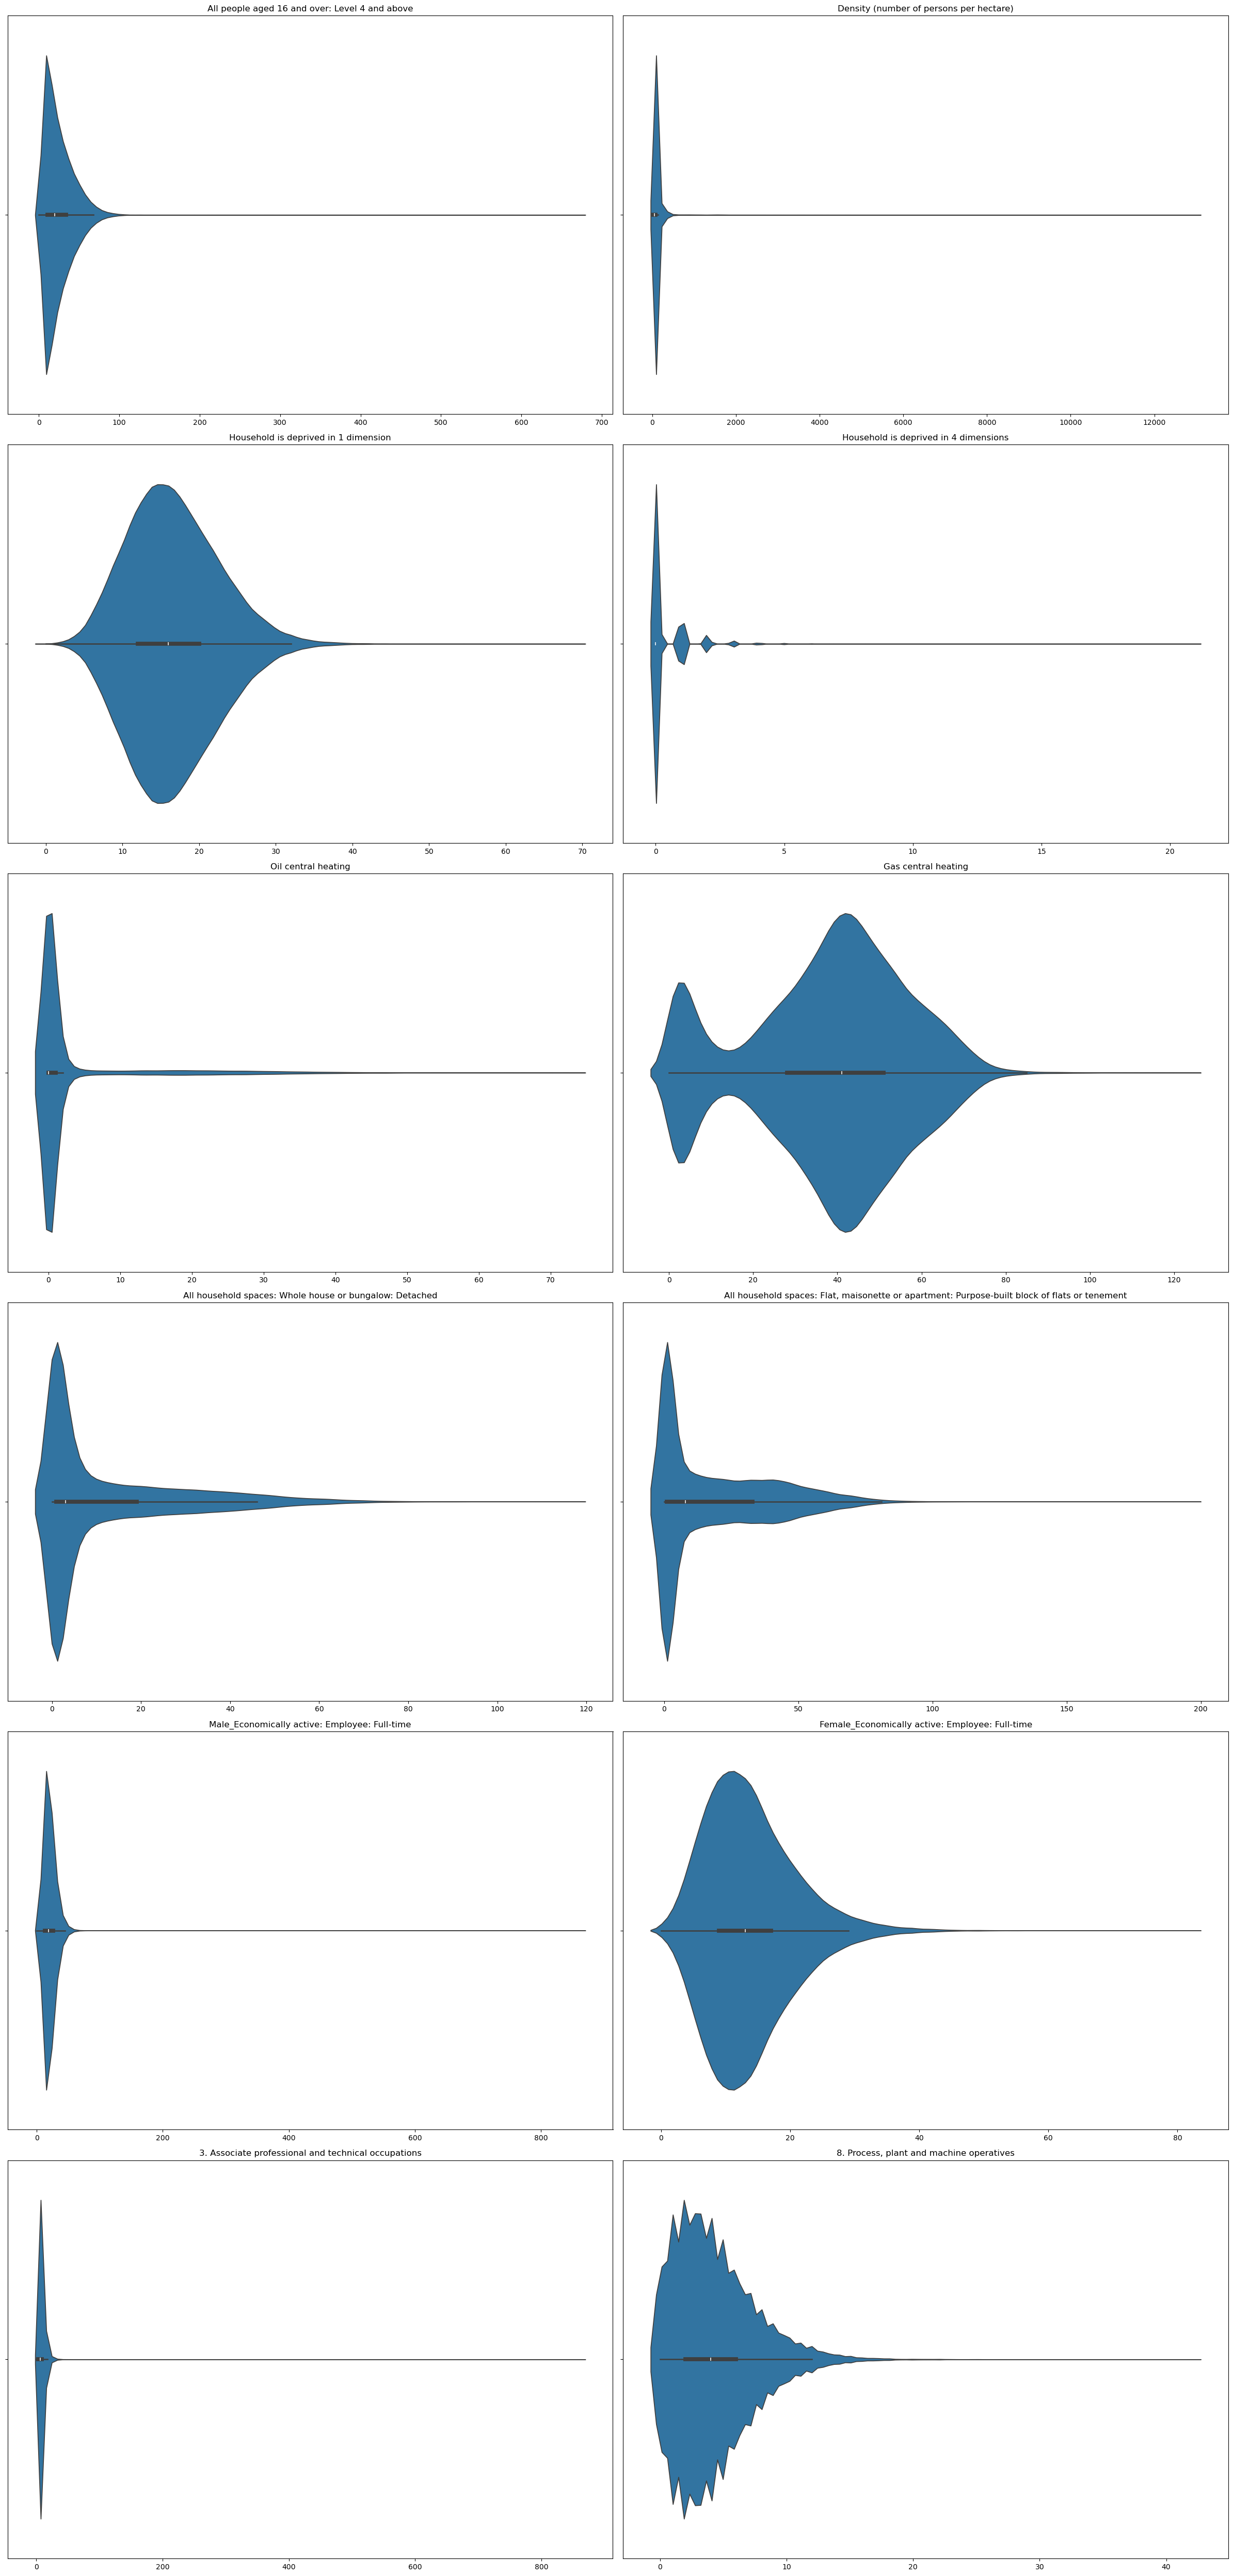

In [19]:
# violin plots 

import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['All people aged 16 and over: Level 4 and above',
                      'Density (number of persons per hectare)',
                      'Household is deprived in 1 dimension',
                      'Household is deprived in 4 dimensions',
                      'Oil central heating',
                      'Gas central heating',
                      'All household spaces: Whole house or bungalow: Detached',
                      'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
                      'Male_Economically active: Employee: Full-time',
                      'Female_Economically active: Employee: Full-time',
                      '3. Associate professional and technical occupations',
                      '8. Process, plant and machine operatives']

plt.figure(figsize=(24, 50))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(6, 2, i)
    sns.violinplot(x=merged_data[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


ss

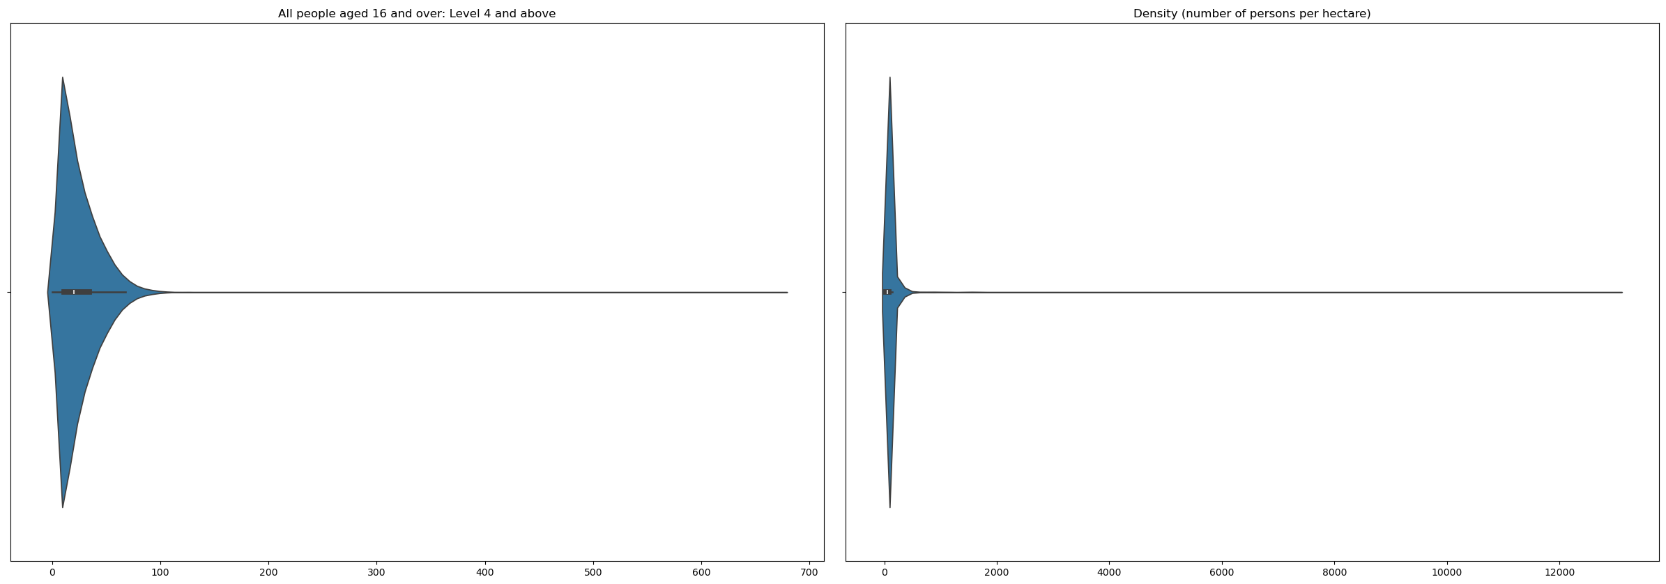
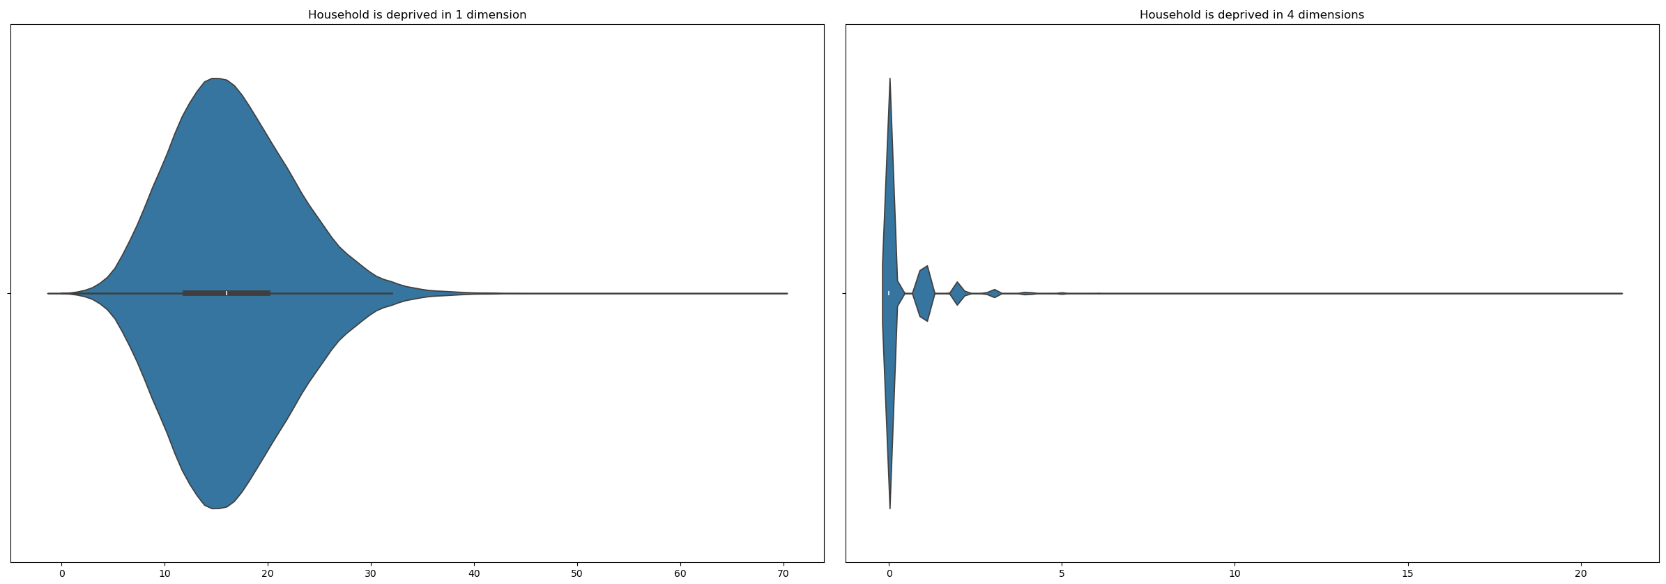
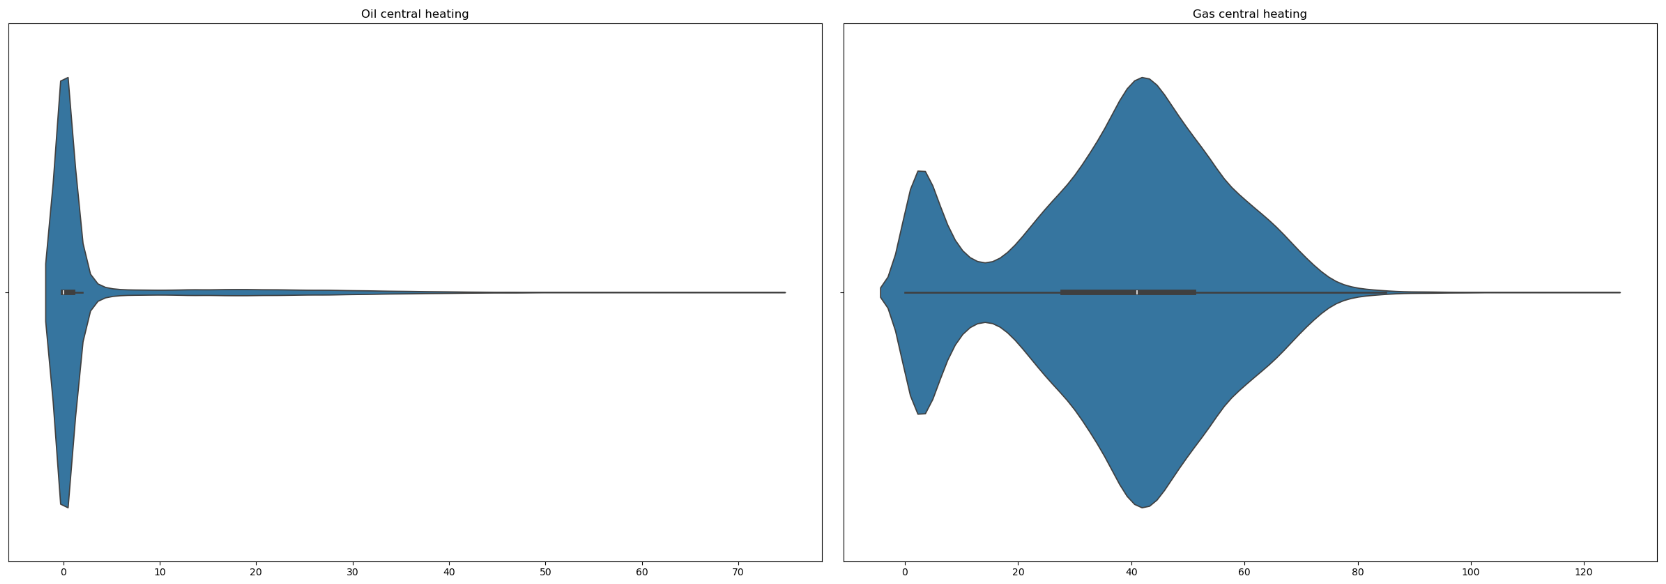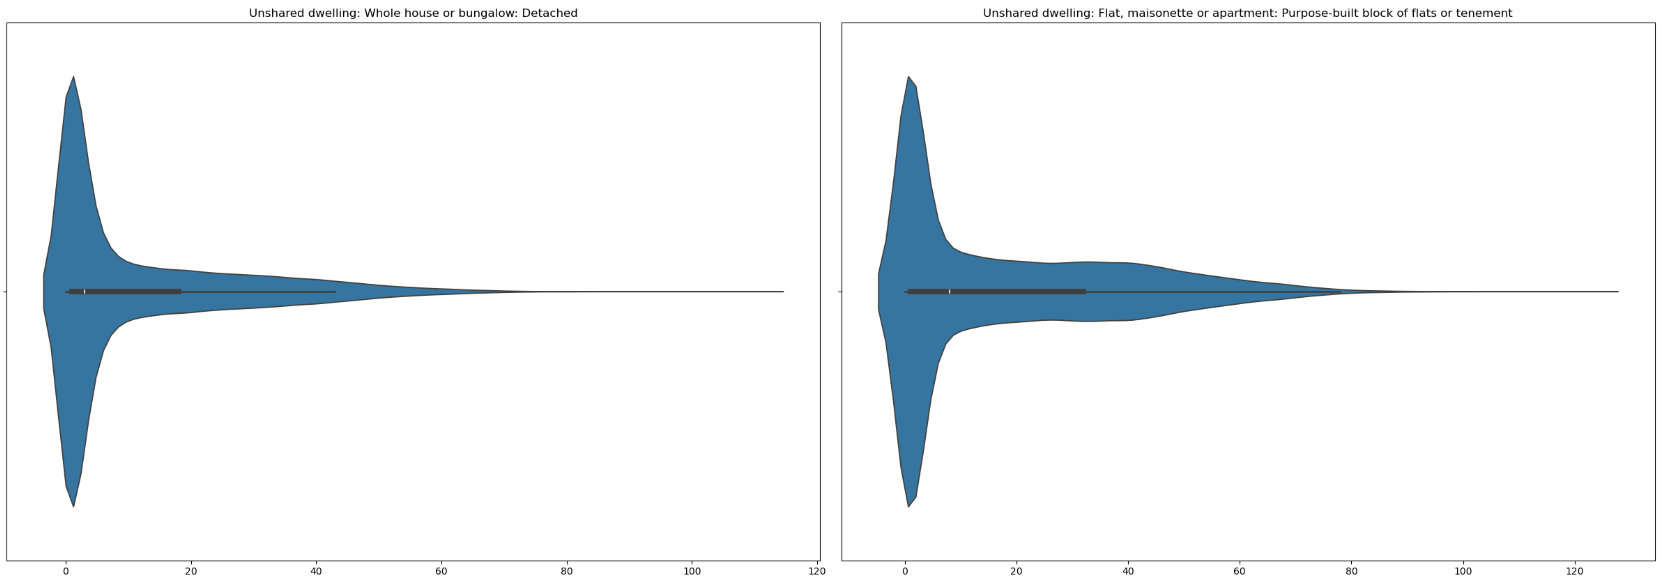
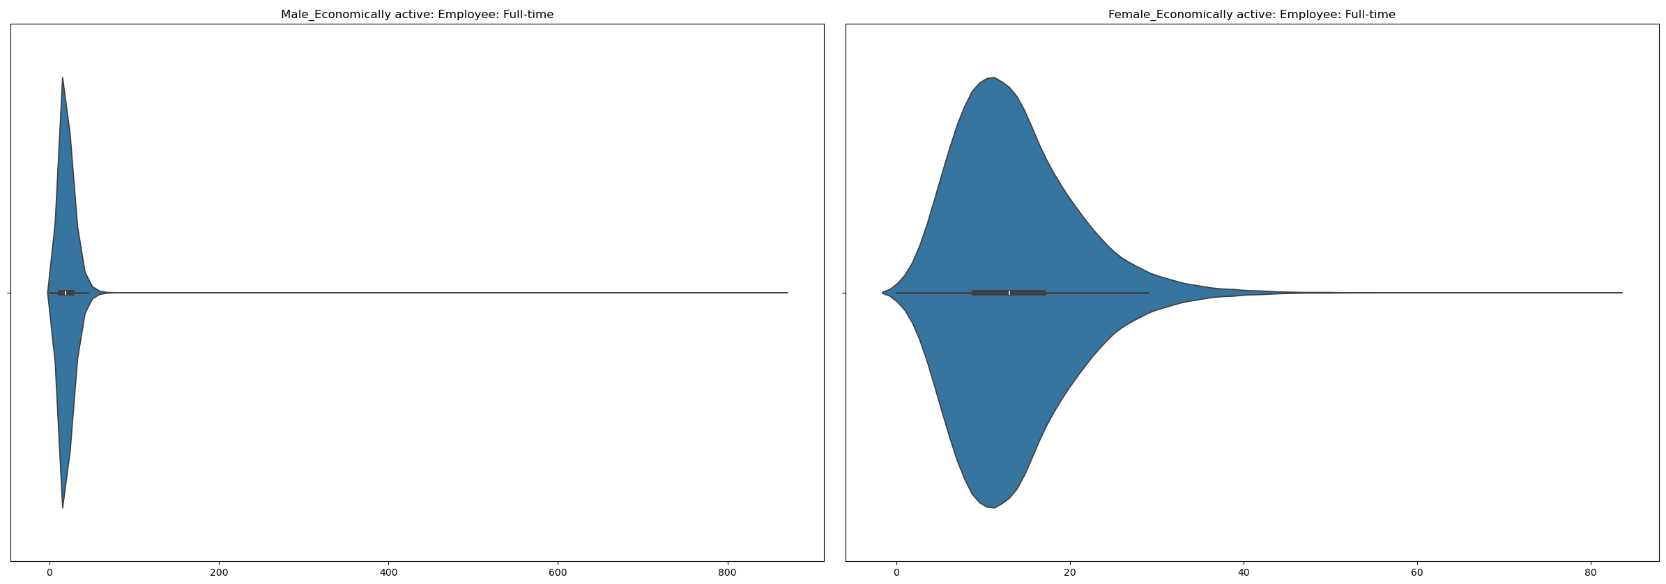
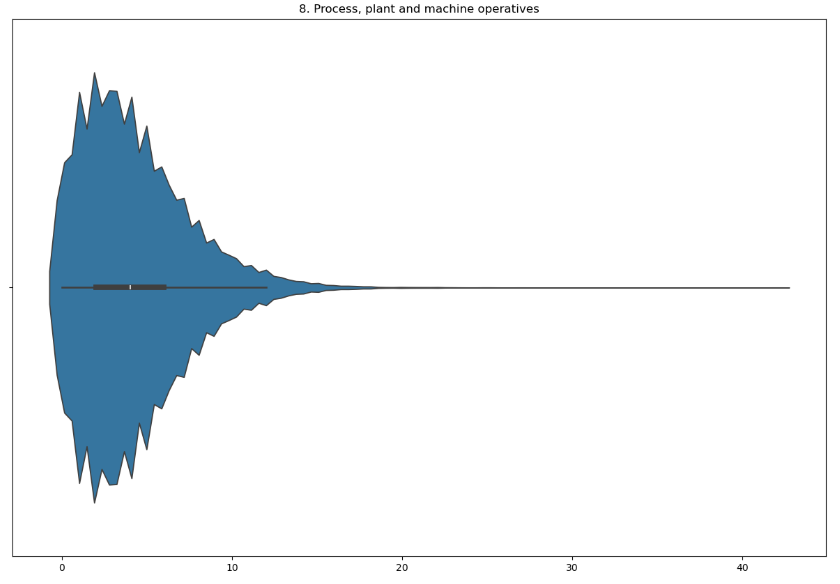


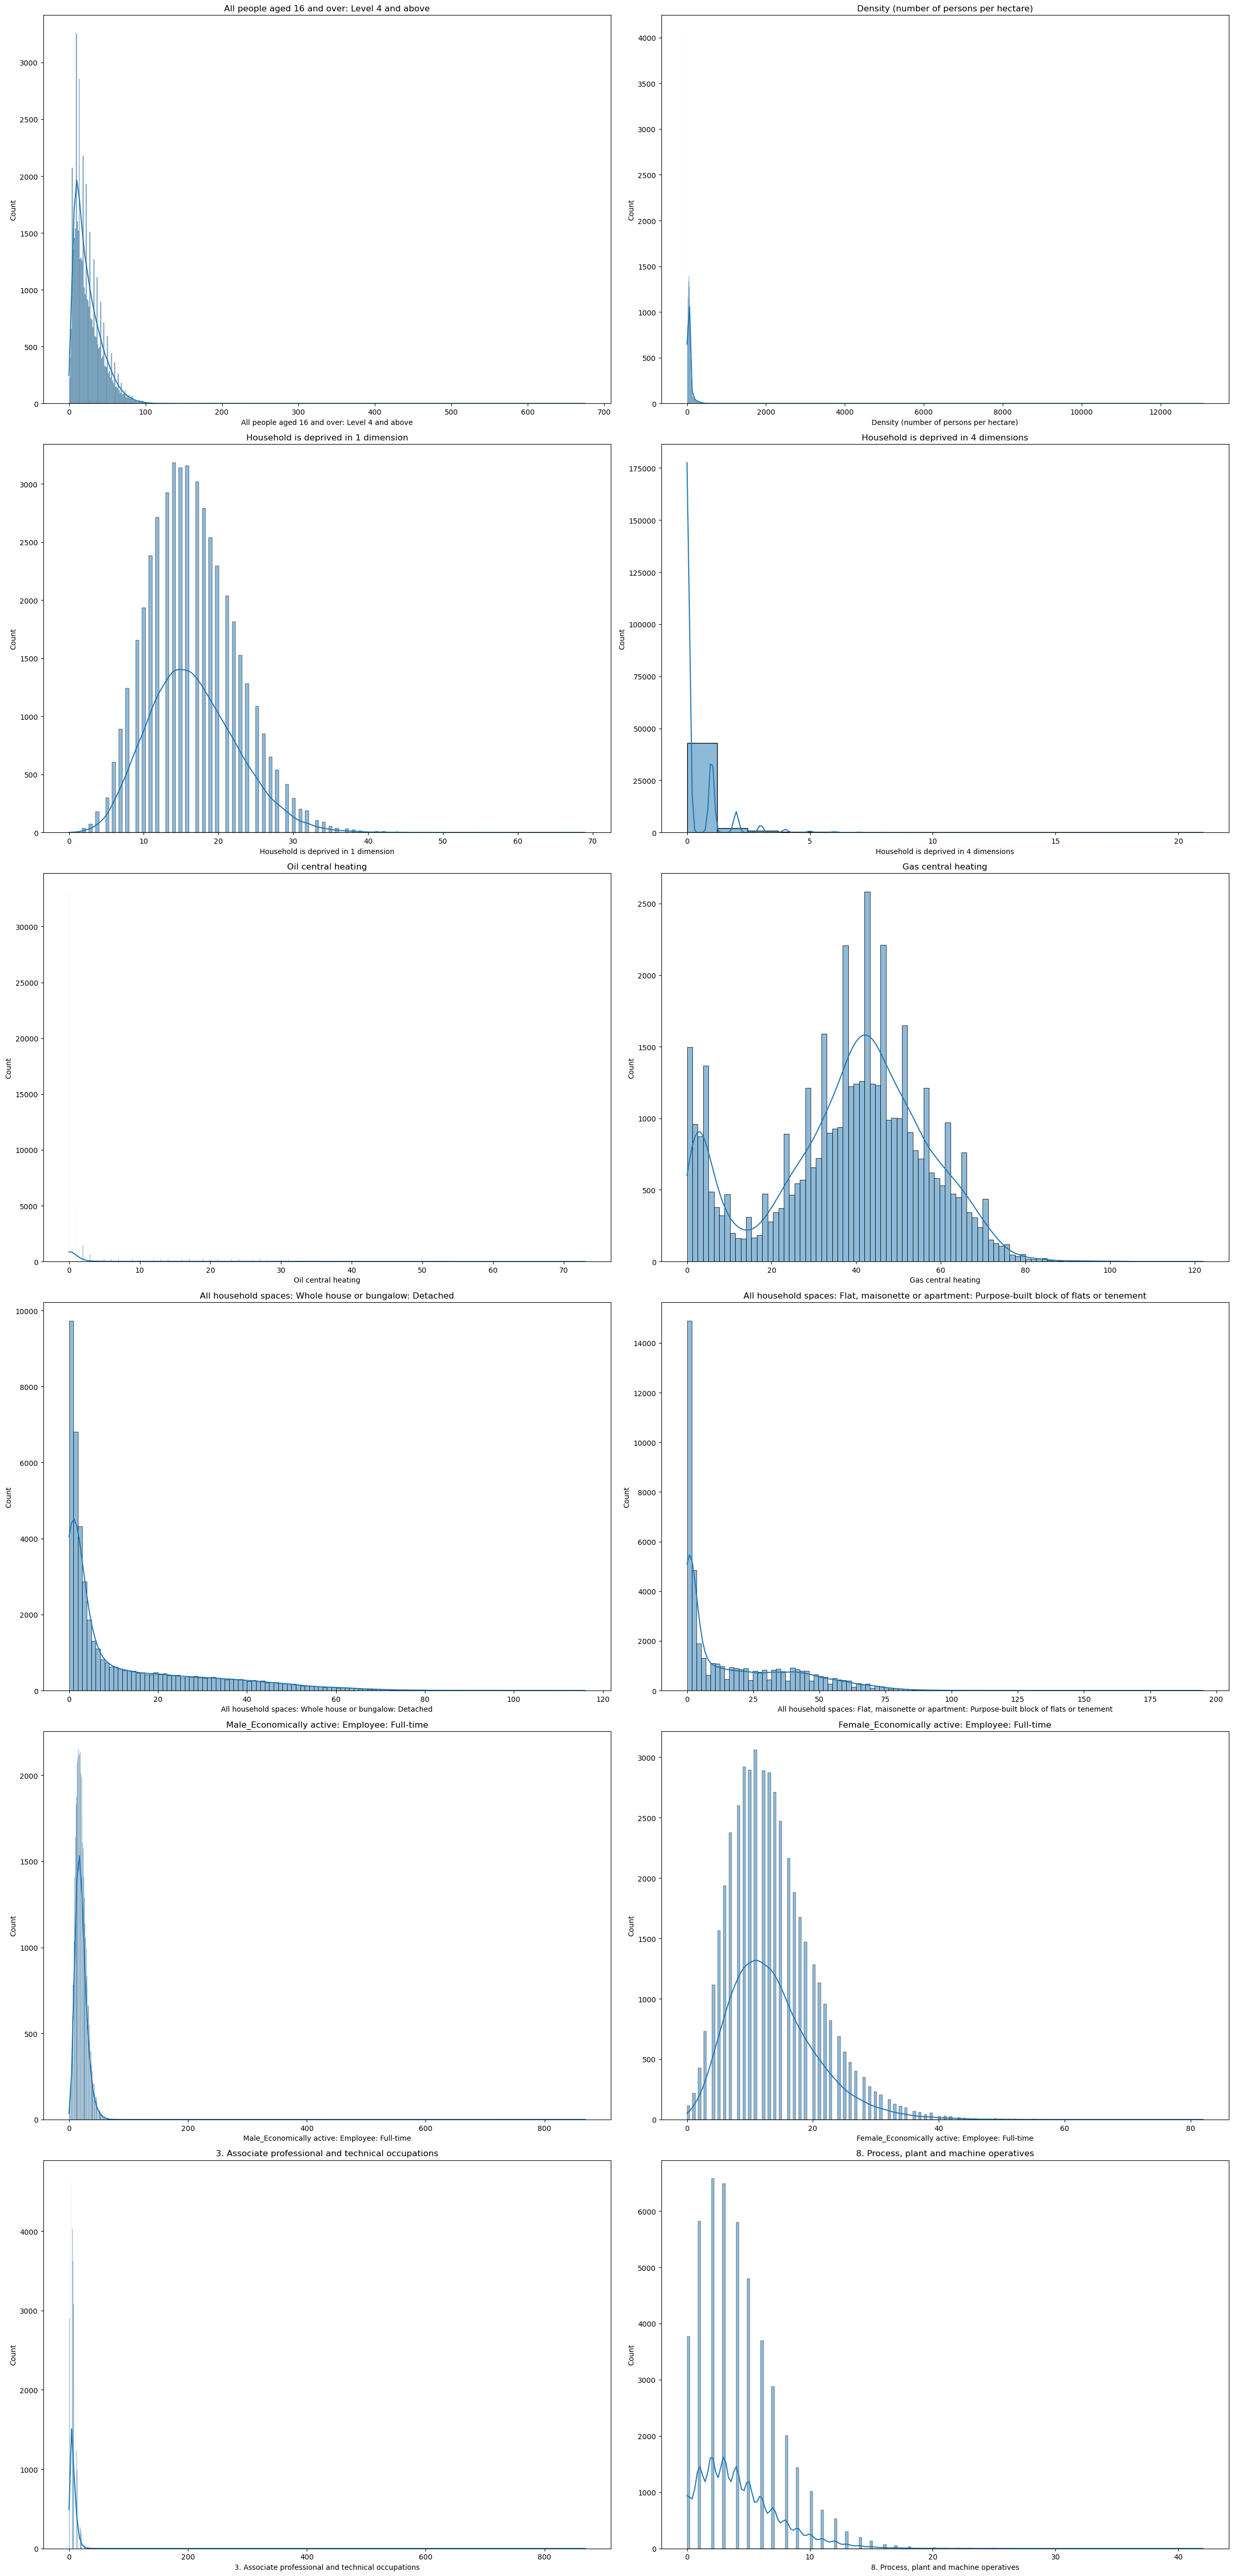

In [20]:
# bar graphs

import matplotlib.pyplot as plt

attributes_to_plot = ['All people aged 16 and over: Level 4 and above',
                      'Density (number of persons per hectare)',
                      'Household is deprived in 1 dimension',
                      'Household is deprived in 4 dimensions',
                      'Oil central heating',
                      'Gas central heating',
                      'All household spaces: Whole house or bungalow: Detached',
                      'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
                      'Male_Economically active: Employee: Full-time',
                      'Female_Economically active: Employee: Full-time',
                      '3. Associate professional and technical occupations',
                      '8. Process, plant and machine operatives']

plt.figure(figsize=(24, 50))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(6, 2, i)
    sns.histplot(merged_data[attribute], kde=True)
    plt.title(attribute)

plt.tight_layout() 
plt.show()

## Standarising Subset


In [21]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # The data have several empty values, so you need to process them, forcing them to be a numeric or NaN value
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding values. 
value_cols = ['Owned: Owned outright',
 'Owned: Owned with a mortgage or loan',
 'Rented: Council (Local authority)',
 'Rented: Private landlord or letting agency',
 'All people aged 16 and over: No qualifications',
 'All people aged 16 and over: Level 4 and above',
 'Female_Economically active: Employee: Full-time',
 'Female_Economically active: Unemployed',
 'Female_Economically inactive: Retired',
 'All household spaces: Whole house or bungalow: Detached',
 'All household spaces: Whole house or bungalow: Semi-detached',
 'All household spaces: Whole house or bungalow: Terraced (including end-terrace)',
 'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
 'All household spaces: Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)',
 'All household spaces: Flat, maisonette or apartment: In a commercial building',
 'All household spaces: Caravan or other mobile or temporary structure',
 'Two rooms',
 'Four rooms',
 'Six rooms',
 'Eight rooms',
 'No central heating',
 'Gas central heating',
 'Oil central heating',
 'Male_Economically active: Employee: Full-time',
 'Male_Economically active: Unemployed',
 'Male_Economically inactive: Retired',
 'Household is not deprived in any dimension',
 'Household is deprived in 1 dimension',
 'Household is deprived in 2 dimensions',
 'Household is deprived in 3 dimensions',
 'Household is deprived in 4 dimensions',
 '+2 or more',
 '-1',
 '-2 or less',
 'One person',
 'Two people',
 'Four people',
 'Six people',
 '1. Managers, directors and senior officials',
 '2. Professional occupations',
 '3. Associate professional and technical occupations',
 '5. Skilled trades occupations',
 '8. Process, plant and machine operatives']


# List of the corresponding totals.
total_cols = ['KS402SC_All households',
              'KS402SC_All households',
              'KS402SC_All households',
              'KS402SC_All households',
              'All people aged 16 and over: Total',
              'All people aged 16 and over: Total',
              'All females aged 16 to 74',
              'All females aged 16 to 74',
              'All females aged 16 to 74',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'QS407SC_All occupied household spaces',
              'QS407SC_All occupied household spaces',
              'QS407SC_All occupied household spaces',
              'QS407SC_All occupied household spaces',
              'QS415SC_All occupied household spaces',
              'QS415SC_All occupied household spaces',
              'QS415SC_All occupied household spaces',
              'All males aged 16 to 74',
              'All males aged 16 to 74',
              'All males aged 16 to 74',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS408SC_All households',
              'QS408SC_All households',
              'QS408SC_All households',
              'QS406SC_All occupied household spaces',
              'QS406SC_All occupied household spaces',
              'QS406SC_All occupied household spaces',
              'QS406SC_All occupied household spaces',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment']
              
result_dataframe = calculate_percentages(merged_data, total_cols, value_cols)

              
              


In [22]:
result_dataframe.head()

Owned: Owned outright_percentage  \
0                               NaN   
1                         18.918919   
2                         50.000000   
3                         33.333333   
4                         21.875000   

   Owned: Owned with a mortgage or loan_percentage  \
0                                              NaN   
1                                        71.621622   
2                                        34.615385   
3                                        55.555556   
4                                        37.500000   

   Rented: Council (Local authority)_percentage  \
0                                           NaN   
1                                      2.702703   
2                                      0.000000   
3                                      0.000000   
4                                     12.500000   

   Rented: Private landlord or letting agency_percentage  \
0                                                NaN       
1                                           4.054054       
2                                          15.384615       
3                                           7.407407       
4                                          18.750000       

   All people aged 16 and over: No qualifications_percentage  \
0                                                NaN           
1                                           9.433962           
2                                          20.689655           
3                                           5.000000           
4                                           9.523810           

   All people aged 16 and over: Level 4 and above_percentage  \
0                                                NaN           
1                                          45.283019           
2                                          36.206897           
3                                          71.666667           
4                                          47.619048           

   Female_Economically active: Employee: Full-time_percentage  \
0                                                NaN            
1                                          32.142857            
2                                          30.769231            
3                                          23.333333            
4                                          20.000000            

   Female_Economically active: Unemployed_percentage  \
0                                                NaN   
1                                           1.190476   
2                                           0.000000   
3                                           0.000000   
4                                           6.666667   

   Female_Economically inactive: Retired_percentage  \
0                                               NaN   
1                                          9.523810   
2                                         11.538462   
3                                          6.666667   
4                                         10.000000   

   All household spaces: Whole house or bungalow: Detached_percentage  ...  \
0                                                NaN                   ...   
1                                          87.837838                   ...   
2                                          78.571429                   ...   
3                                          92.592593                   ...   
4                                          57.142857                   ...   

   -2 or less_percentage  One person_percentage  Two people_percentage  \
0                    NaN                    NaN                    NaN   
1               1.351351               4.054054              33.783784   
2               0.000000              23.076923              38.461538   
3               0.000000               7.407407              14.814815   
4               0.000000              15.625000              43.750000   

   Four people_percentage  Six p

In [23]:
result_dataframe.shape

(46352, 43)

In [24]:
# Concatenate the resulting tables.
concatenated_df = pd.concat([merged_data, result_dataframe], axis=1, ignore_index=False)
concatenated_df.head()

oa_code  KS402SC_All households  Owned: Owned outright  \
0  S00088956                     NaN                    NaN   
1  S00088957                    74.0                   14.0   
2  S00088958                    26.0                   13.0   
3  S00088959                    27.0                    9.0   
4  S00088960                    32.0                    7.0   

   Owned: Owned with a mortgage or loan  \
0                                   NaN   
1                                  53.0   
2                                   9.0   
3                                  15.0   
4                                  12.0   

   Owned: Shared ownership (part owned and part rented)  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                1.0      
4                                                0.0      

   Rented: Council (Local authority)  Rented: Other social rented  \
0                                NaN                          NaN   
1                                2.0                          0.0   
2                                0.0                          0.0   
3                                0.0                          0.0   
4                                4.0                          0.0   

   Rented: Private landlord or letting agency  Rented: Other  \
0                                         NaN            NaN   
1                                         3.0            0.0   
2                                         4.0            0.0   
3                                         2.0            0.0   
4                                         6.0            0.0   

   Living rent free  ...  -2 or less_percentage  One person_percentage  \
0               NaN  ...                    NaN                    NaN   
1               1.0  ...               1.351351               4.054054   
2               0.0  ...               0.000000              23.076923   
3               0.0  ...               0.000000               7.407407   
4               3.0  ...               0.000000              15.625000   

   Two people_percentage  Four people_percentage  Six people_percentage  \
0                    NaN                     NaN                    NaN   
1              33.783784               29.729730               1.351351   
2              38.461538               11.538462               3.846154   
3              14.814815               29.629630               0.000000   
4              43.750000               15.625000               0.000000   

   1. Managers, directors and senior officials_percentage  \
0                                                NaN        
1                                          14.529915        
2                                          17.500000        
3                                          29.268293        
4                                          16.279070        

   2. Professional occupations_percentage  \
0                                     NaN   
1                               29.914530   
2                               15.000000   
3                               31.707317   
4                               25.581395   

   3. Associate professional and technical occupations_percentage  \
0                                                NaN                
1                                          17.948718                
2                                          20.000000                
3                                          14.634146                
4                                           9.302326                

   5. Skilled trades occupations_percentage  \
0                                       NaN   
1                                  8.547009   
2                                 10.000000   
3                                  2.439024   
4                           

In [25]:
concatenated_df.shape

(46352, 156)

In [26]:
# calculating z scores

numeric_columns = concatenated_df.select_dtypes(include='float64')
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)
z_score_df.head()

KS402SC_All households  Owned: Owned outright  \
0                     NaN                    NaN   
1                1.692768              -0.026217   
2               -1.869626              -0.129822   
3               -1.795409              -0.544240   
4               -1.424326              -0.751449   

   Owned: Owned with a mortgage or loan  \
0                                   NaN   
1                              3.448194   
2                             -0.797326   
3                             -0.218392   
4                             -0.507859   

   Owned: Shared ownership (part owned and part rented)  \
0                                                NaN      
1                                           0.708977      
2                                          -0.199234      
3                                           0.708977      
4                                          -0.199234      

   Rented: Council (Local authority)  Rented: Other social rented  \
0                                NaN                          NaN   
1                          -0.437807                    -0.490687   
2                          -0.622251                    -0.490687   
3                          -0.622251                    -0.490687   
4                          -0.253363                    -0.490687   

   Rented: Private landlord or letting agency  Rented: Other  \
0                                         NaN            NaN   
1                                   -0.368111       -0.45219   
2                                   -0.230961       -0.45219   
3                                   -0.505261       -0.45219   
4                                    0.043340       -0.45219   

   Living rent free  All people aged 16 and over: Total  ...  \
0               NaN                                 NaN  ...   
1          0.282136                            1.674154  ...   
2         -0.541837                           -0.946427  ...   
3         -0.541837                           -0.894535  ...   
4          1.930080                           -0.816696  ...   

   -2 or less_percentage  One person_percentage  Two people_percentage  \
0                    NaN                    NaN                    NaN   
1              -0.191355              -1.806627              -0.041055   
2              -0.671485              -0.663095               0.436409   
3              -0.671485              -1.605045              -1.977243   
4              -0.671485              -1.111056               0.976210   

   Four people_percentage  Six people_percentage  \
0                     NaN                    NaN   
1                2.286567               0.372655   
2               -0.014690               2.047292   
3                2.273904              -0.534441   
4                0.502271              -0.534441   

   1. Managers, directors and senior officials_percentage  \
0                                                NaN        
1                                           1.136400        
2                                           1.650710        
3                                           3.688548        
4                                           1.439290        

   2. Professional occupations_percentage  \
0                                     NaN   
1                                1.274290   
2                               -0.066951   
3                                1.435512   
4                                0.884618   

   3. Associate professional and technical occupations_percentage  \
0                                                NaN                
1                                           0.911452                
2                                           1.226818                
3                                           0.401867                
4                                          -0.417852                

   5. Skilled trades occupations_percentage  \
0                                

In [27]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

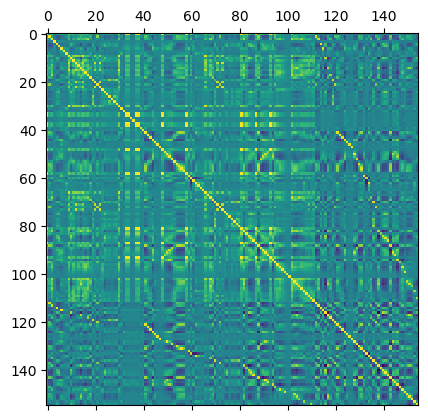

In [28]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

/Users/Lynsey/miniforge3/envs/ua/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Lynsey/miniforge3/envs/ua/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


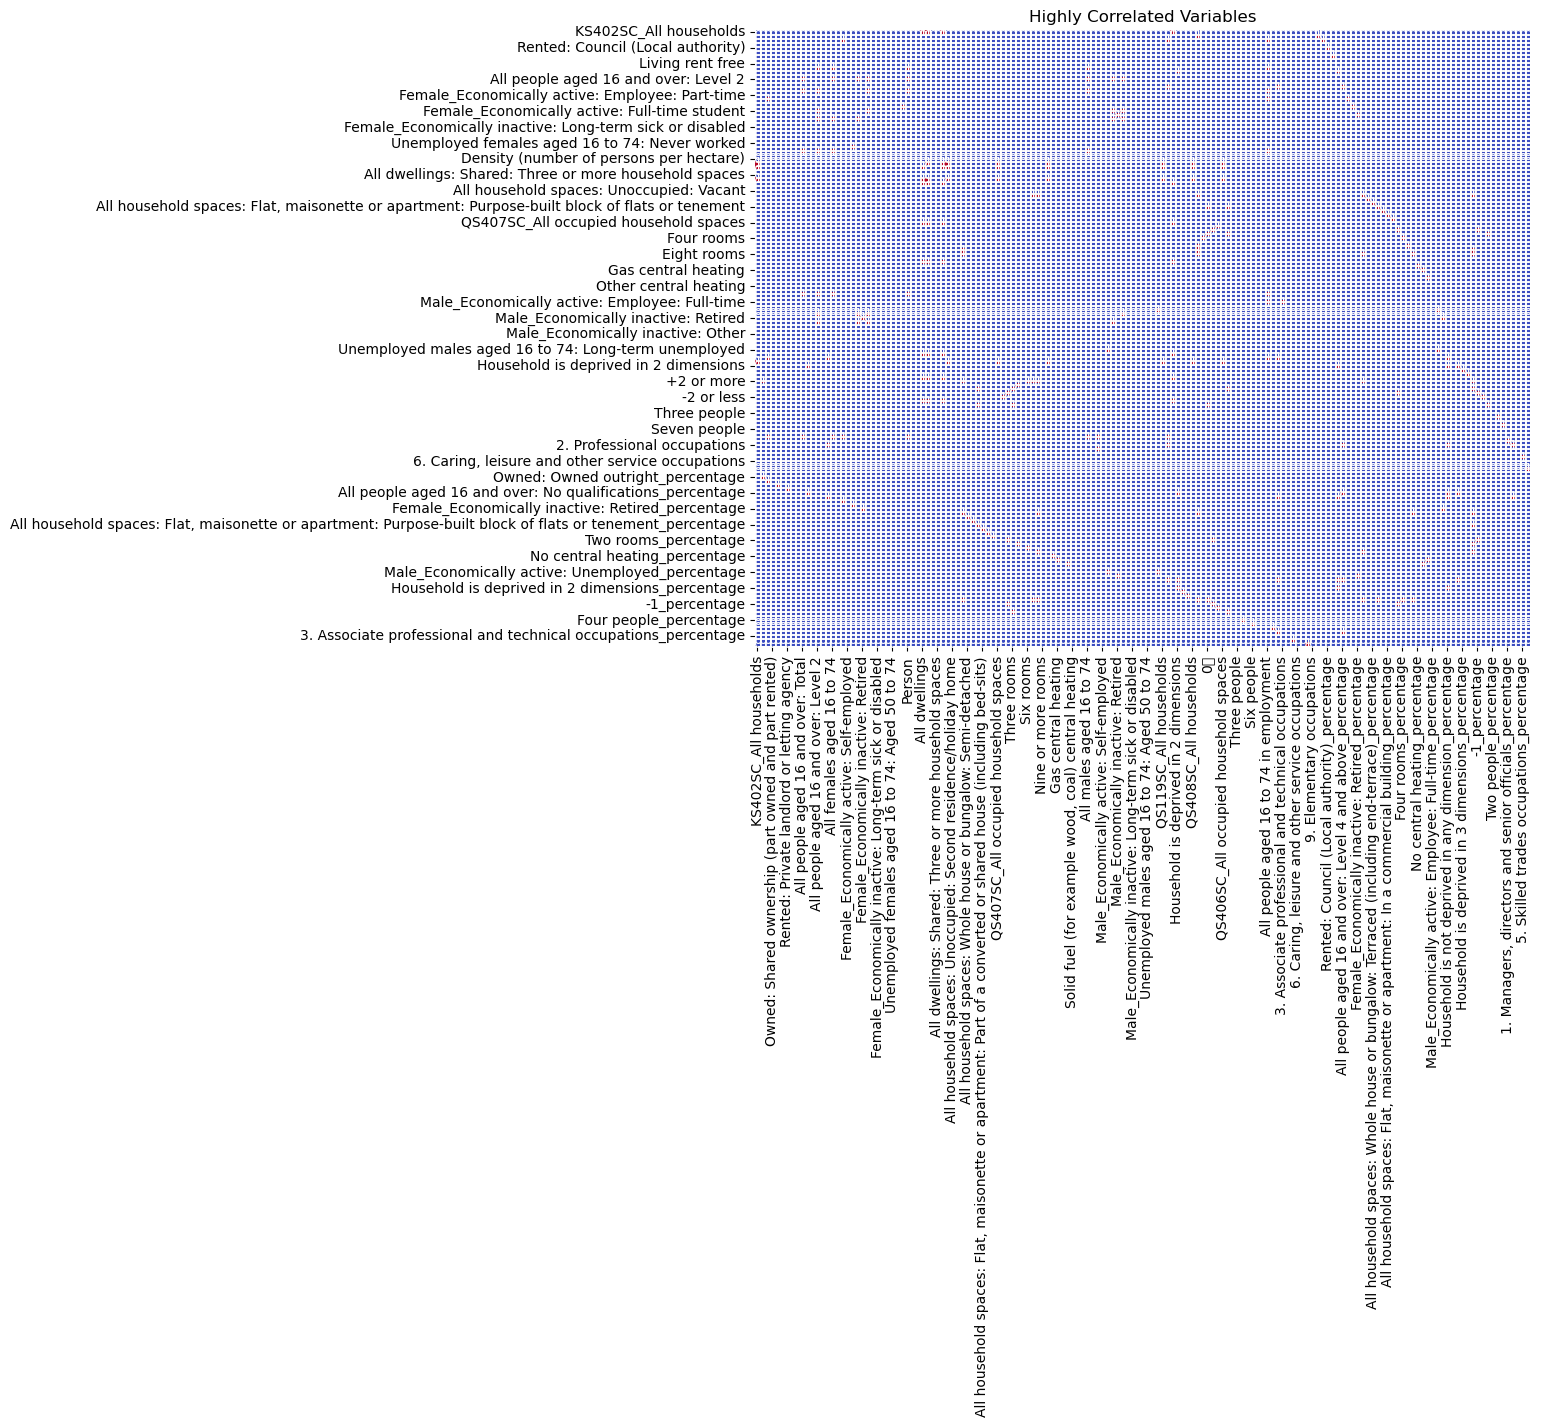

In [29]:
threshold = 0.7 # 0.7 threshold add comment about why in report

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

In [30]:
import numpy as np

corr_matrix = result_dataframe.corr().abs() #calculating correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) #upper triangle setting k=1

threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)] # setting treshold

reduced_df = result_dataframe.drop(columns=to_drop) #dropping variables above the threshold

print(f"dropped {len(to_drop)} highly correlated variables:")
print(to_drop) #showing the dropped variables


dropped 9 highly correlated variables:
['All people aged 16 and over: Level 4 and above_percentage', 'Eight rooms_percentage', 'Oil central heating_percentage', 'Male_Economically inactive: Retired_percentage', 'Household is not deprived in any dimension_percentage', 'Household is deprived in 2 dimensions_percentage', '+2 or more_percentage', '-1_percentage', '2. Professional occupations_percentage']


In [31]:
contains_nan = z_score_df.isna().any().any()

if contains_nan:
    print("contains nans")
else:
    print("no nans") #ensuring there are no nans

contains nans


In [32]:
z_score_df.fillna(z_score_df.mean(), inplace=True)
z_score_df.head()

KS402SC_All households  Owned: Owned outright  \
0           -7.910079e-17           4.966794e-17   
1            1.692768e+00          -2.621689e-02   
2           -1.869626e+00          -1.298215e-01   
3           -1.795409e+00          -5.442401e-01   
4           -1.424326e+00          -7.514494e-01   

   Owned: Owned with a mortgage or loan  \
0                         -1.324478e-16   
1                          3.448194e+00   
2                         -7.973263e-01   
3                         -2.183917e-01   
4                         -5.078590e-01   

   Owned: Shared ownership (part owned and part rented)  \
0                                      -2.084827e-17      
1                                       7.089770e-01      
2                                      -1.992339e-01      
3                                       7.089770e-01      
4                                      -1.992339e-01      

   Rented: Council (Local authority)  Rented: Other social rented  \
0                      -6.377118e-17                 4.905475e-17   
1                      -4.378074e-01                -4.906866e-01   
2                      -6.222514e-01                -4.906866e-01   
3                      -6.222514e-01                -4.906866e-01   
4                      -2.533633e-01                -4.906866e-01   

   Rented: Private landlord or letting agency  Rented: Other  \
0                                1.471643e-17  -5.641296e-17   
1                               -3.681108e-01  -4.521901e-01   
2                               -2.309606e-01  -4.521901e-01   
3                               -5.052609e-01  -4.521901e-01   
4                                4.333970e-02  -4.521901e-01   

   Living rent free  All people aged 16 and over: Total  ...  \
0     -7.358213e-18                       -1.759839e-16  ...   
1      2.821355e-01                        1.674154e+00  ...   
2     -5.418368e-01                       -9.464272e-01  ...   
3     -5.418368e-01                       -8.945346e-01  ...   
4      1.930080e+00                       -8.166955e-01  ...   

   -2 or less_percentage  One person_percentage  Two people_percentage  \
0           3.433833e-17          -1.299951e-16           5.518659e-18   
1          -1.913555e-01          -1.806627e+00          -4.105524e-02   
2          -6.714846e-01          -6.630947e-01           4.364093e-01   
3          -6.714846e-01          -1.605045e+00          -1.977243e+00   
4          -6.714846e-01          -1.111056e+00           9.762095e-01   

   Four people_percentage  Six people_percentage  \
0           -1.937663e-16          -9.504358e-17   
1            2.286567e+00           3.726545e-01   
2           -1.469002e-02           2.047292e+00   
3            2.273904e+00          -5.344406e-01   
4            5.022709e-01          -5.344406e-01   

   1. Managers, directors and senior officials_percentage  \
0                                       3.311767e-17        
1                                       1.136400e+00        
2                                       1.650710e+00        
3                                       3.688548e+00        
4                                       1.439290e+00        

   2. Professional occupations_percentage  \
0                            8.708721e-17   
1                            1.274290e+00   
2                           -6.695100e-02   
3                            1.435512e+00   
4                            8.846176e-01   

   3. Associate professional and technical occupations_percentage  \
0                                      -3.271903e-16                
1                                       9.114523e-01                
2                                       1.226818e+00                
3                                       4.018669e-01                
4                                      -4.178525e-01                

   5. Skilled trades occupations_percentage  \
0                             -6.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(reduced_df.dropna())


In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters = model.fit_predict(X_scaled)

# Add clusters back to your dataframe
reduced_df['cluster'] = clusters


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or cluster size')
plt.ylabel('Distance')
plt.show()
